G:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=500,center=False).mean()
G:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=500,center=False).var()


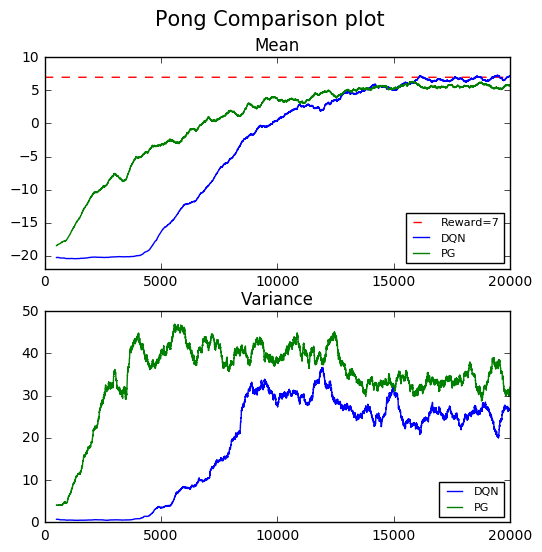

In [25]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

interval =500

reward_hist_dqn_pong = pickle.load(open('all_reward_dqn_pong.p','rb'))
# reward_hist_dqn_breakout = pickle.load(open('all_reward_dqn_breakout.p','rb'))
reward_hist_pg_pong = pickle.load(open('all_reward_pg_pong.p','rb'))
reward_hist_pg_breakout = pickle.load(open('all_reward_pg_breakout.p','rb'))

def get_mean_var(reward_hist):
    ts = pd.Series(reward_hist[:20000])
    return pd.rolling_mean(ts, interval), pd.rolling_var(ts, interval)

reward_hist_dqn_pong_mean, reward_hist_dqn_pong_var = get_mean_var(reward_hist_dqn_pong)
# reward_hist_dqn_breakout_mean, reward_hist_dqn_breakout_var = get_mean_var(reward_hist_dqn_breakout)
reward_hist_pg_pong_mean, reward_hist_pg_pong_var = get_mean_var(reward_hist_pg_pong)
reward_hist_pg_breakout_mean, reward_hist_pg_breakout_var = get_mean_var(reward_hist_pg_breakout)

fig,axe = plt.subplots(2,1,figsize=(6,6))
plt.suptitle('Pong Comparison plot', fontsize=15)
axe[0].set_ylim(-22,10)
axe[0].plot([7]*20000,'r--',label='Reward=7')
axe[0].plot(reward_hist_dqn_pong_mean,label='DQN')
axe[0].plot(reward_hist_pg_pong_mean,label='PG')
axe[0].legend(loc=4,fontsize=8) 
axe[0].set_title('Mean',fontsize=12)
axe[1].plot(reward_hist_dqn_pong_var,label='DQN')
axe[1].plot(reward_hist_pg_pong_var,label='PG')
axe[1].legend(loc=4,fontsize=8) 
axe[1].set_title('Variance',fontsize=12)
plt.subplots_adjust(hspace=0.2)
plt.show()
fig.savefig('Pong_comp.jpg')

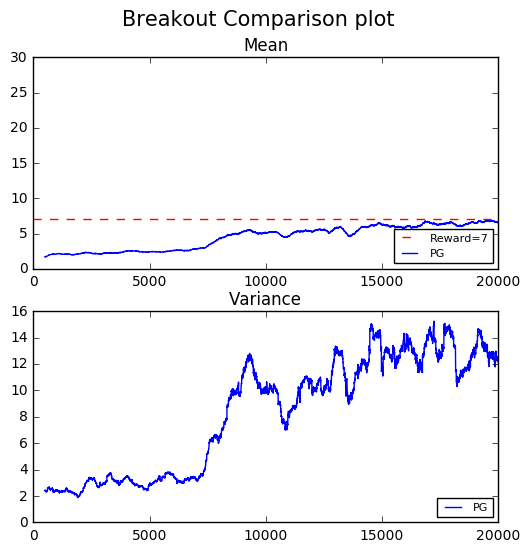

In [26]:
fig,axe = plt.subplots(2,1,figsize=(6,6))
plt.suptitle('Breakout Comparison plot', fontsize=15)
axe[0].set_ylim(0,30)
axe[0].plot([7]*20000,'r--',label='Reward=7')
# axe[0].plot(reward_hist_dqn_breakout_mean,label='DQN')
axe[0].plot(reward_hist_pg_breakout_mean,label='PG')
axe[0].legend(loc=4,fontsize=8) 
axe[0].set_title('Mean',fontsize=12)
# axe[1].plot(reward_hist_dqn_breakout_var,label='DQN')
axe[1].plot(reward_hist_pg_breakout_var,label='PG')
axe[1].legend(loc=4,fontsize=8) 
axe[1].set_title('Variance',fontsize=12)
plt.subplots_adjust(hspace=0.2)
plt.show()
fig.savefig('Breakout_comp.jpg')